# SHAP (SHapley Additive exPlanations) values

## Regression

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestRegressor().fit(X_train, y_train)
print(model.score(X_test, y_test))

0.672323915010292


### California housing dataset. 

This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [4]:
y

array([1.369  , 2.413  , 2.007  , 0.725  , 4.6    , 1.2    , 2.47   ,
       3.369  , 3.397  , 2.656  , 2.379  , 0.922  , 0.795  , 1.375  ,
       2.201  , 2.761  , 3.953  , 3.     , 1.827  , 3.864  , 1.314  ,
       0.742  , 2.31   , 3.941  , 1.761  , 1.734  , 2.021  , 1.708  ,
       0.926  , 0.57   , 4.657  , 3.726  , 4.     , 1.539  , 1.     ,
       1.587  , 1.421  , 1.396  , 3.197  , 1.313  , 1.107  , 0.849  ,
       0.704  , 2.76   , 1.58   , 0.542  , 1.232  , 1.162  , 1.592  ,
       2.155  , 2.781  , 0.66   , 2.929  , 1.712  , 2.75   , 0.962  ,
       5.00001, 1.676  , 1.829  , 2.231  , 1.733  , 1.891  , 1.177  ,
       2.468  , 0.618  , 0.934  , 0.557  , 3.905  , 2.03   , 0.889  ,
       5.00001, 1.703  , 1.55   , 0.579  , 5.00001, 1.083  , 3.506  ,
       2.032  , 2.214  , 1.553  , 2.706  , 2.     , 0.875  , 2.045  ,
       1.969  , 1.839  , 0.786  , 1.458  , 0.767  , 0.985  , 2.217  ,
       1.713  , 0.618  , 2.747  , 0.75   , 2.042  , 3.75   , 2.408  ,
       1.391  , 3.90

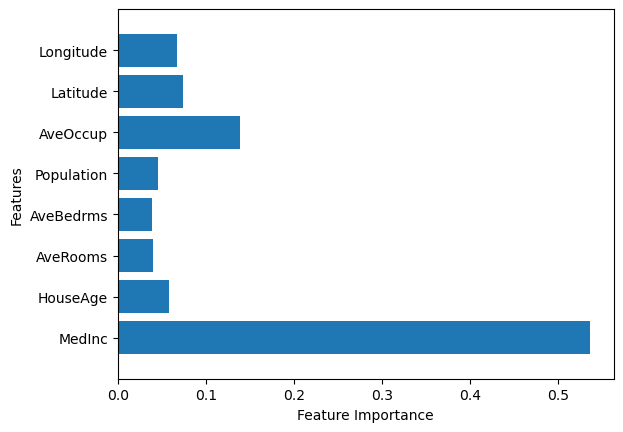

In [5]:
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()
plot_feature_importances(model, X_train.shape[1], X_train.columns)

### explainer

In [6]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

In [7]:
print(X_test.shape)
print(shap_values.shape)
print(shap_values)

(250, 8)
(250, 8)
[[-0.13414817 -0.08633754 -0.03002445 ... -0.05938304 -0.38152096
   0.05335032]
 [ 0.20561422 -0.05756523  0.01269139 ...  0.15125197  0.00685627
   0.16099019]
 [-0.04865175  0.0056006  -0.0479677  ... -0.26984987  0.0941964
  -0.18213349]
 ...
 [ 0.16614895  0.01910725 -0.01305683 ... -0.15156974 -0.35996478
   0.11497296]
 [ 0.5349883   0.1500431  -0.03096047 ...  0.08911453  0.13791062
  -0.09098377]
 [-0.42624602 -0.01648516 -0.07850053 ... -0.17097255  0.2308049
  -0.08327422]]


### summary plot

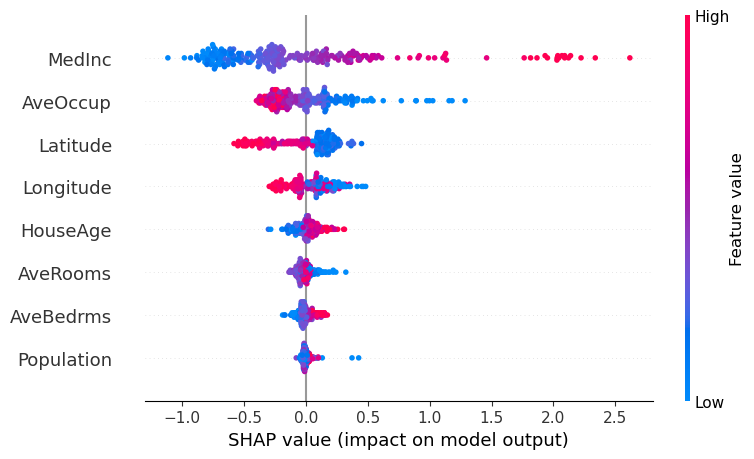

In [8]:
shap.summary_plot(shap_values, X_test)

### force_plot

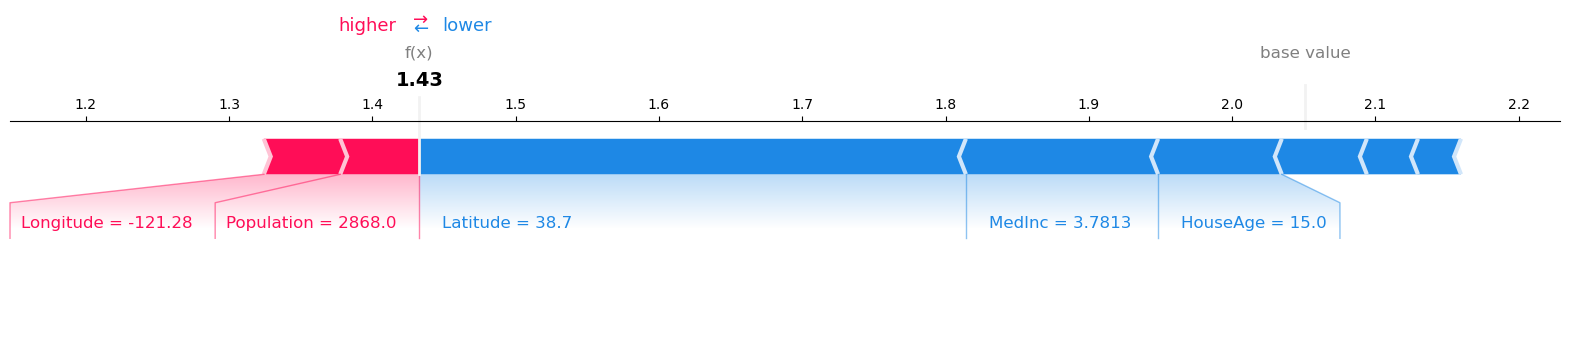

In [9]:
shap.initjs() # if you see an error, excute this line

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True) #about data point 0 

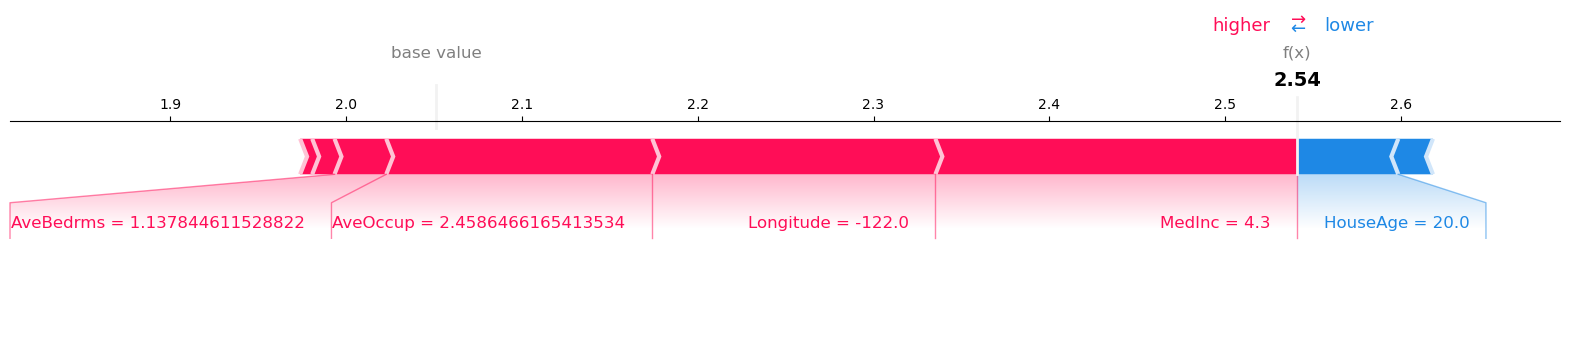

In [10]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:], matplotlib=True) #about data point 1

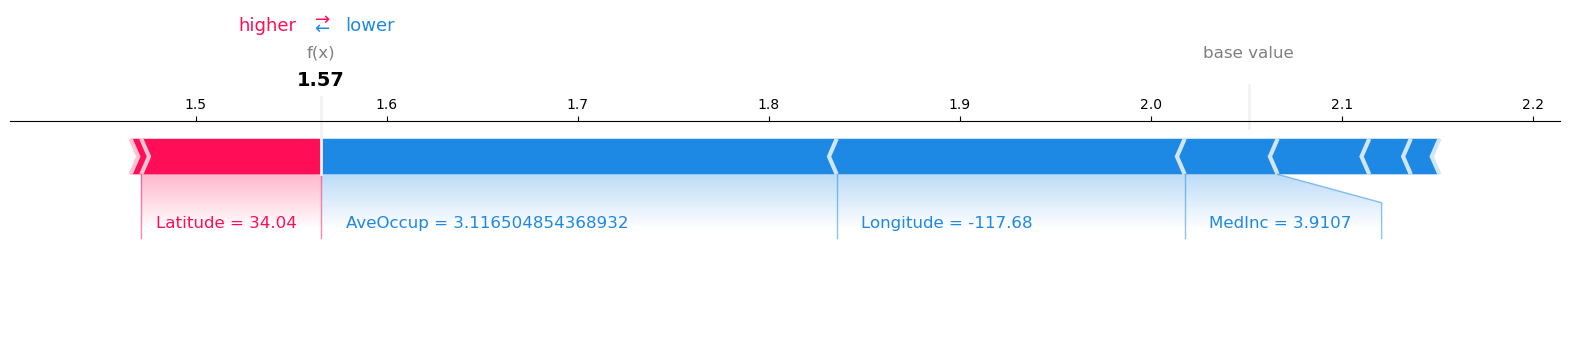

In [11]:
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:], matplotlib=True) #about data point 2

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test) 

## Classification

In [13]:
from sklearn.ensemble import RandomForestClassifier

class Crowdfunding:
    def __init__(self):
        self._df = pd.read_excel('data/crowdfunding_ex.xlsx')
        self._x_df = self._df[["Backers", "CountryCode", "VideoCount", "ImageCount", "Goal", "Period", "Total_Updates"]]
        self._y = self._df['Funded'] > self._df['Goal'] # Success

    @property
    def x_df(self):
        return self._x_df

    @property
    def y(self):
        return self._y
    
cf = Crowdfunding()
X = cf.x_df

def target_class_change(value):
    if value == 2:
        new_value = 0
    else:
        new_value = 1
    return new_value

y = cf.y.apply(target_class_change)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train

,Backers,CountryCode,VideoCount,ImageCount,Goal,Period,Total_Updates
762,77,10,0,30,35000.0,44,1
127,213,1,1,21,25000.0,44,1
564,0,2,0,0,100.0,60,1
375,0,1,0,0,300.0,30,0
663,362,1,0,9,25000.0,32,5
...,...,...,...,...,...,...,...
707,6,1,0,0,500.0,30,2
192,12,1,0,1,2500.0,29,0
629,34,1,0,0,97000.0,40,1
559,165,1,1,6,50000.0,29,2


In [14]:
print(X_train.shape)

(575, 7)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


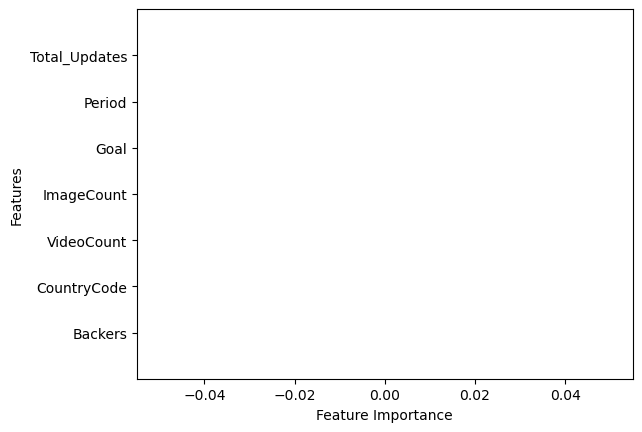

In [16]:
tree =RandomForestClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

plot_feature_importances(tree, X_test.shape[1], X_test.columns)